In [452]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from pandas.plotting import parallel_coordinates
from sklearn.neighbors import KNeighborsClassifier
# To evaluate our model
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [453]:
sonar=pd.read_csv("/content/drive/MyDrive/selected topics/sonar.csv")
sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [454]:
X = sonar.copy()

labels=  X.pop('Class')

# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
sonar['Class_enc'] = le.fit_transform(sonar['Class'])

y=sonar['Class_enc']

print(X)
print(y)
print(labels)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

Feature selection

In [455]:
v_threshold = VarianceThreshold(threshold=0.008)
v_threshold.fit(X)
print(v_threshold.get_support())
allfeatures=v_threshold.get_support()

[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False]


In [456]:
selected_features=[]
j=1
for i in allfeatures:
  if(i==True):
    selected_features.append('attribute_' + str(j))
  j+=1

# print(selected_features)
# for i in selected_features:
#   print(sonar[i])
print(len(selected_features))

38


In [457]:
columns=selected_features
df = pd.read_csv("/content/drive/MyDrive/selected topics/sonar.csv", usecols=selected_features)
# print(df.head())
x2=df.copy()
df['Class_enc'] = le.fit_transform(sonar['Class'])

y2=df['Class_enc']

# print(X)
# print(y)

Data visualization for the selected features

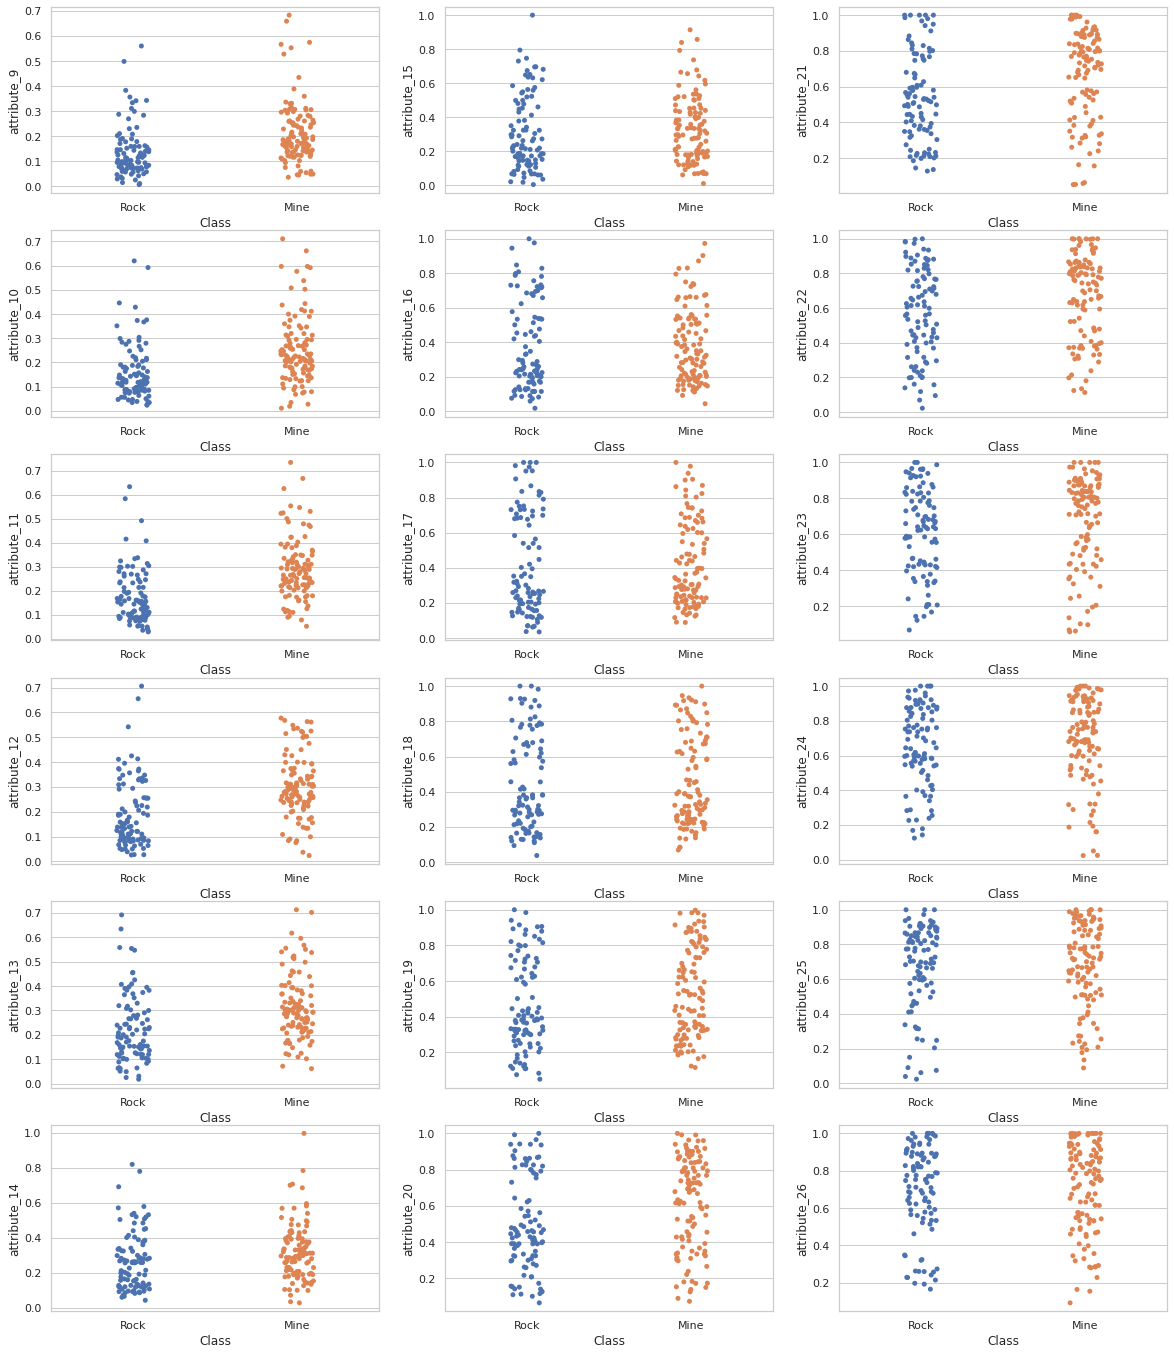

In [458]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(6, 3,sharey=False,sharex=False, figsize=(20,24))
x=0
for i in range(0,3):
  for j in range(0,6):
    if x>=18:
      break;
    sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes[j,i])
    x+=1
  if x>=18:
      break;


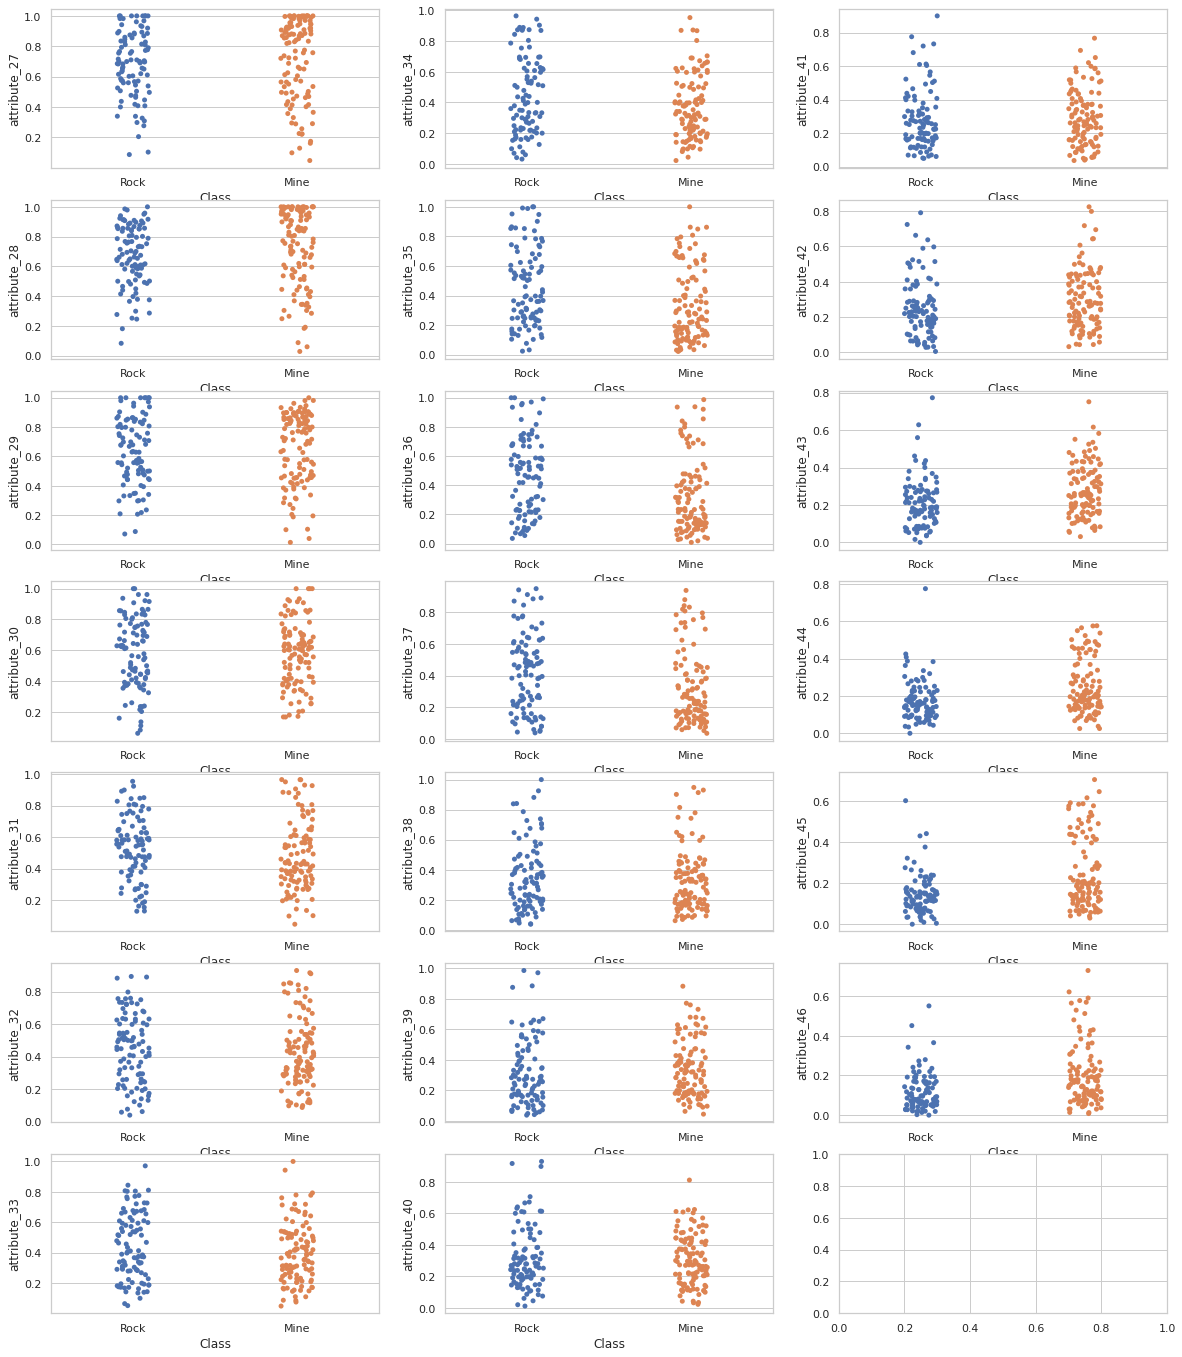

In [459]:
fig2, axes2 = plt.subplots(7, 3,sharey=False,sharex=False, figsize=(20,24))
for i in range(0,3):
  for j in range(0,7):
    if x>=len(selected_features):
      break;
    sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes2[j,i])
    x+=1
  if x>=len(selected_features):
      break;

Without feature selection



In [460]:
#stratify: split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
#Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time the code is run

#using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)

0.8461538461538461
Confusion Matrix

[[26  2]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.90      0.75      0.82        24

    accuracy                           0.85        52
   macro avg       0.86      0.84      0.84        52
weighted avg       0.85      0.85      0.84        52


ROC AUC Score: 0.8392857142857143


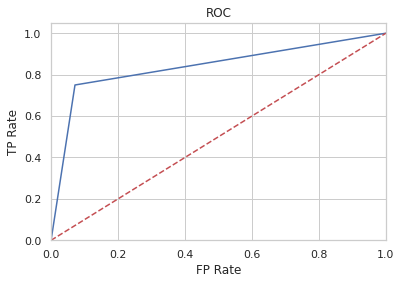

In [461]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
# print(model.predict_proba(X_test))
print(knn.score(X_test, y_test))

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = knn.predict_proba(X_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

With feature selection

In [462]:
#using some features
df_train, df_test, dfy_train, dfy_test = train_test_split(x2, y2, test_size=0.25, random_state=2, stratify=y2)

0.8461538461538461
Confusion Matrix

[[26  2]
 [ 6 18]]


Classification Report

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.90      0.75      0.82        24

    accuracy                           0.85        52
   macro avg       0.86      0.84      0.84        52
weighted avg       0.85      0.85      0.84        52


ROC AUC Score: 0.8392857142857143


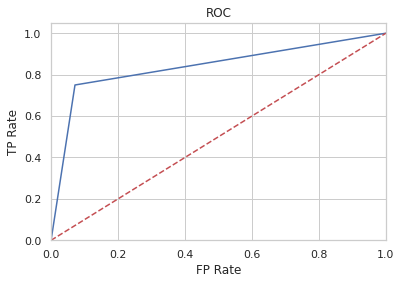

In [463]:
# print(df_train)
# print(dfy_train)
knn = KNeighborsClassifier(1)
knn.fit(df_train, dfy_train)

y_pred=knn.predict(df_test)
# print(model.predict_proba(X_test))
print(knn.score(df_test, dfy_test))

# Print the Confusion Matrix
cm = confusion_matrix(dfy_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(dfy_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(dfy_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = knn.predict_proba(df_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(dfy_test, y_pred)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()